In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data

In [2]:
aerosol = pd.read_csv("/content/drive/MyDrive/aerosola2final/africa.csv")


In [3]:
aerosol.info()
aerosol.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63234 entries, 0 to 63233
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Site                                          63234 non-null  object 
 1   Date(dd:mm:yyyy)                              63234 non-null  object 
 2   Time(hh:mm:ss)                                63234 non-null  object 
 3   Day_of_Year                                   63234 non-null  int64  
 4   Day_of_Year(Fraction)                         63234 non-null  float64
 5   AOD_Extinction-Total[440nm]                   63234 non-null  float64
 6   AOD_Extinction-Total[675nm]                   63234 non-null  float64
 7   AOD_Extinction-Total[870nm]                   63234 non-null  float64
 8   AOD_Extinction-Total[1020nm]                  63234 non-null  float64
 9   AOD_Extinction-Fine[440nm]                    63234 non-null 

(63234, 35)

In [4]:
aerosol['Site'].unique()

array(['Banizoumbou', 'Dakar', 'Ilorin', 'Cairo_University',
       'IER_Cinzana', 'Saada', 'Tamanrasset_TMP', 'ICIPE-Mbita',
       'Zinder_DMN', 'CRPSM_Malindi', 'Cairo_EMA_2', 'Henties_Bay',
       'Bujumbura', 'Mongu_Inn', 'SEGC_Lope_Gabon', 'CATUC_Bamenda',
       'UEM_Maputo'], dtype=object)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


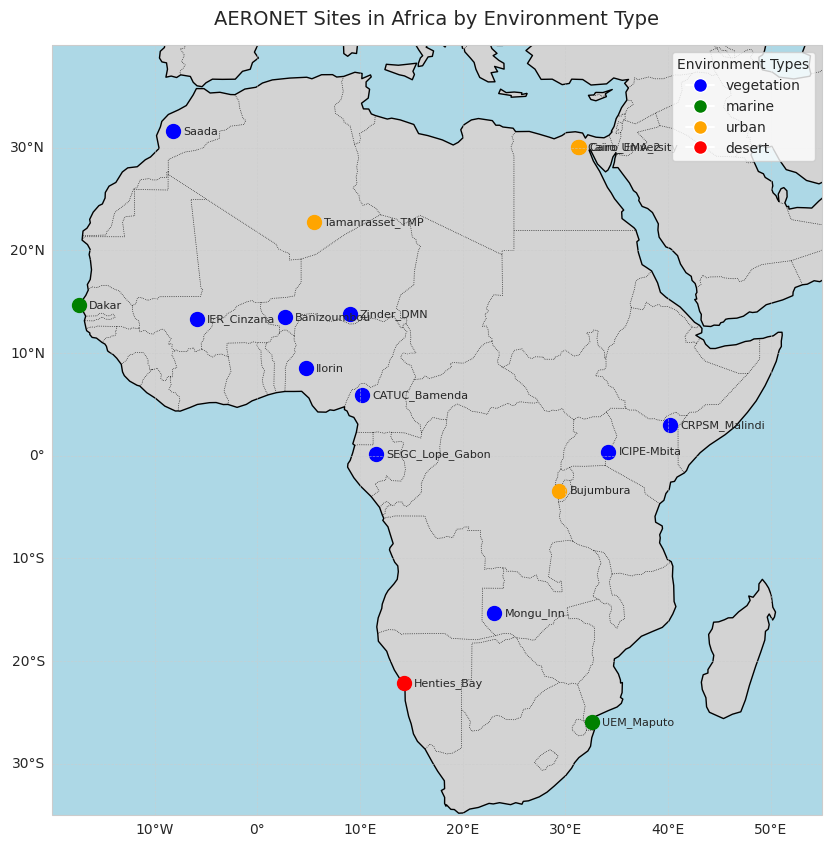

Percentage Breakdown by Environment Type:
Vegetation: 58.8%
Marine: 11.8%
Urban: 23.5%
Desert: 5.9%


In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Define the sites with updated coordinates and environment types
sites = [
    {"name": "Banizoumbou", "coords": (13.5, 2.7), "env": "vegetation"},
    {"name": "Dakar", "coords": (14.7, -17.4), "env": "marine"},
    {"name": "Ilorin", "coords": (8.5, 4.7), "env": "vegetation"},
    {"name": "Cairo_University", "coords": (30.1, 31.2), "env": "urban"},
    {"name": "IER_Cinzana", "coords": (13.3, -5.9), "env": "vegetation"},
    {"name": "Saada", "coords": (31.6, -8.2), "env": "vegetation"},
    {"name": "Tamanrasset_TMP", "coords": (22.8, 5.5), "env": "urban"},
    {"name": "ICIPE-Mbita", "coords": (0.4, 34.2), "env": "vegetation"},
    {"name": "Zinder_DMN", "coords": (13.8, 9.0), "env": "vegetation"},
    {"name": "CRPSM_Malindi", "coords": (3.0, 40.2), "env": "vegetation"},
    {"name": "Cairo_EMA_2", "coords": (30.1, 31.3), "env": "urban"},
    {"name": "Henties_Bay", "coords": (-22.1, 14.3), "env": "desert"},
    {"name": "Bujumbura", "coords": (-3.4, 29.4), "env": "urban"},
    {"name": "Mongu_Inn", "coords": (-15.3, 23.1), "env": "vegetation"},
    {"name": "SEGC_Lope_Gabon", "coords": (0.2, 11.6), "env": "vegetation"},
    {"name": "CATUC_Bamenda", "coords": (5.9, 10.2), "env": "vegetation"},
    {"name": "UEM_Maputo", "coords": (-25.9, 32.6), "env": "marine"},
]

# Define colors for each environment type
env_colors = {
    "vegetation": "blue",
    "urban": "orange",
    "marine": "green",
    "desert": "red"
}

# Create a figure and axis with Cartopy
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent to focus on Africa (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-20, 55, -35, 40], crs=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.5)

# Plot each site as a colored marker and add labels
handles = {}
for site in sites:
    lon, lat = site["coords"][1], site["coords"][0]  # (lat, lon) to (lon, lat) for plotting
    env = site["env"]
    # Plot the marker
    ax.plot(lon, lat, marker="o", color=env_colors[env], markersize=10,
            transform=ccrs.PlateCarree())
    # Add site name label with a small offset to the right
    ax.text(lon + 1, lat, site["name"], transform=ccrs.PlateCarree(),
            fontsize=8, ha="left", va="center")
    # Store one handle per environment type for the legend
    if env not in handles:
        handles[env] = plt.Line2D([0], [0], marker="o", color="w",
                                  markerfacecolor=env_colors[env], markersize=10, label=env)

# Add the legend using the collected handles
ax.legend(handles=handles.values(), title="Environment Types", loc="upper right")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.7)
gl.top_labels = False
gl.right_labels = False

# Add a title
plt.title("AERONET Sites in Africa by Environment Type", fontsize=14, pad=15)

# Show the plot
plt.show()

# Calculate percentage breakdown by environment type
total_sites = len(sites)
env_counts = {}
for site in sites:
    env = site["env"]
    env_counts[env] = env_counts.get(env, 0) + 1

# Print percentage breakdown
print("Percentage Breakdown by Environment Type:")
for env, count in env_counts.items():
    percentage = (count / total_sites) * 100
    print(f"{env.capitalize()}: {percentage:.1f}%")

# Handling Missing Value

In [6]:
# Drop rows where any column has the value -999
aerosol_cleaned = aerosol[~(aerosol == -999).any(axis=1)]

# Assign the cleaned DataFrame back to aerosol
aerosol = aerosol_cleaned

# Verify the change
print(aerosol.shape)



(27352, 35)


# Add calculated columns using Dubovik and King’s formulae and compute the differences with the provided data.

In [7]:
# adding calculated data cols according to Dubovik and King provided formulae and differnce with provided data
# Calculate EAE
aerosol["Calculated_EAE"] = -np.log(aerosol["AOD_Extinction-Total[440nm]"] / aerosol["AOD_Extinction-Total[870nm]"]) / np.log(440 / 870)


# Difference in EAE
aerosol["EAE_Difference"] = aerosol["Extinction_Angstrom_Exponent_440-870nm-Total"] - aerosol["Calculated_EAE"]

# Calculate AAOD and their differences for different wavelengths
for wl in ['440nm', '675nm', '870nm', '1020nm']:
    aerosol[f'Calculated_AAOD[{wl}]'] = aerosol[f'AOD_Extinction-Total[{wl}]'] * (1 - aerosol[f'Single_Scattering_Albedo[{wl}]'])
    aerosol[f'AAOD_Difference[{wl}]'] = aerosol[f'Absorption_AOD[{wl}]'] - aerosol[f'Calculated_AAOD[{wl}]']

# Calculate AAE
aerosol["Calculated_AAE"] = (-np.log(aerosol["Calculated_AAOD[870nm]"]) + np.log(aerosol["Calculated_AAOD[440nm]"])) / np.log(440 / 870)

# Difference in AAE
aerosol["AAE_Difference"] = aerosol["Absorption_Angstrom_Exponent_440-870nm"] - aerosol["Calculated_AAE"]

# Frequency Distribution of Aerosol Optical Properties Fig 2

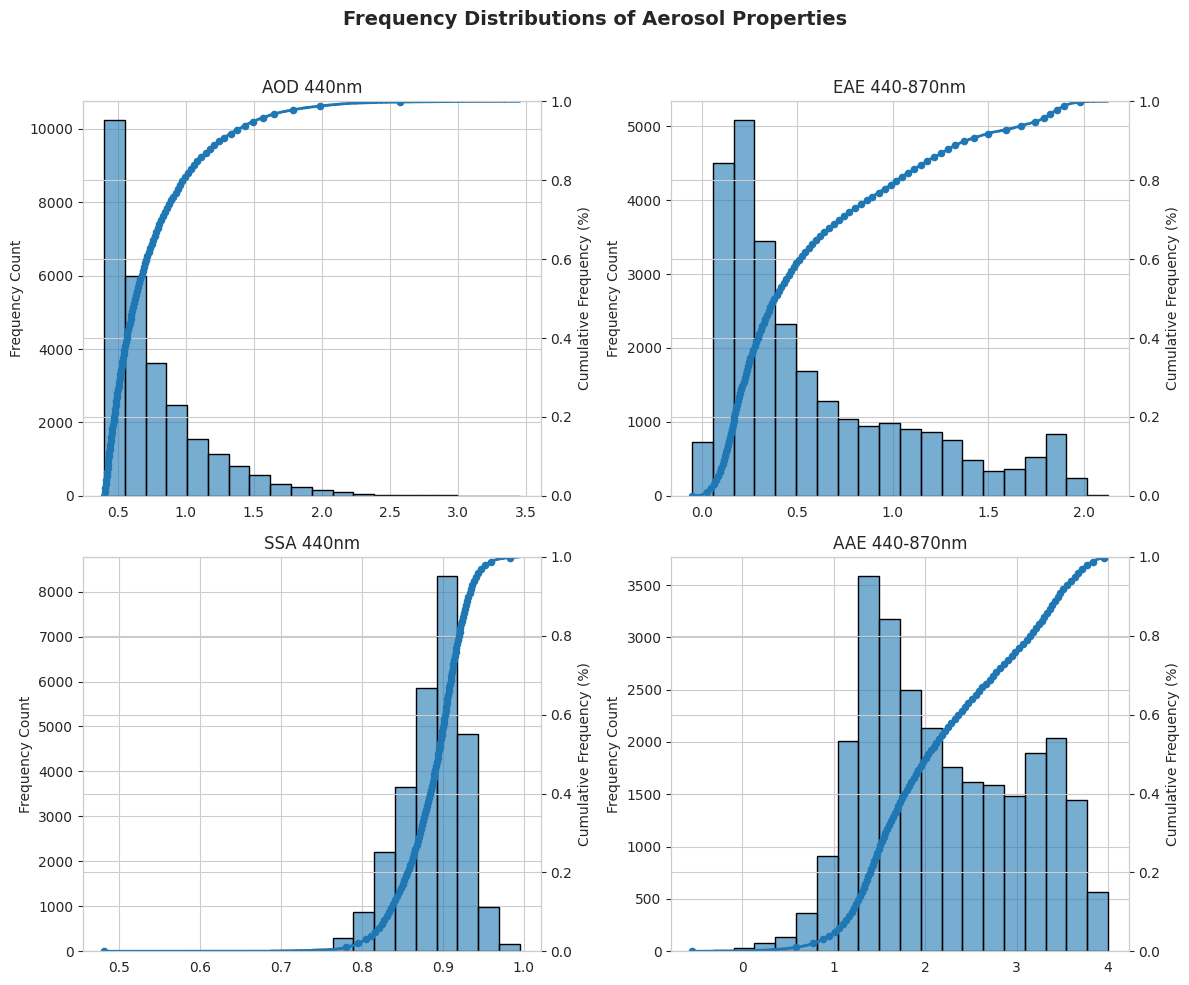

In [8]:

# Set style
sns.set_style("whitegrid")

# Define the columns for plotting
columns = {
    "AOD 440nm": "AOD_Extinction-Total[440nm]",
    "EAE 440-870nm": "Extinction_Angstrom_Exponent_440-870nm-Total",
    "SSA 440nm": "Single_Scattering_Albedo[440nm]",
    "AAE 440-870nm": "Absorption_Angstrom_Exponent_440-870nm"
}

# Define figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Frequency Distributions of Aerosol Properties", fontsize=14, fontweight="bold")

# Iterate over columns and axes
for ax, (title, col) in zip(axes.flatten(), columns.items()):
    # Plot histogram with increased bins
    sns.histplot(aerosol[col], bins=20, kde=False, edgecolor="black", alpha=0.6, ax=ax)

    # Overlay cumulative distribution with spaced dots
    ax2 = ax.twinx()
    sorted_data = np.sort(aerosol[col].dropna())  # Sort values & drop NaN
    spacing_factor = max(1, len(sorted_data) // 100)  # Adjust spacing dynamically
    sns.ecdfplot(sorted_data, ax=ax2, linewidth=2)  # Smooth ECDF
    ax2.scatter(sorted_data[::spacing_factor], np.linspace(0, 1, len(sorted_data))[::spacing_factor], s=20)  # Adds spaced dots

    # Formatting
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Frequency Count")
    ax2.set_ylabel("Cumulative Frequency (%)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Fig. 3. Scatter plots of fine mode AODs, AAOD, EAE, AAE, SSA, and real refractive index.

In [9]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 89.7 MB/s eta 0:00:00


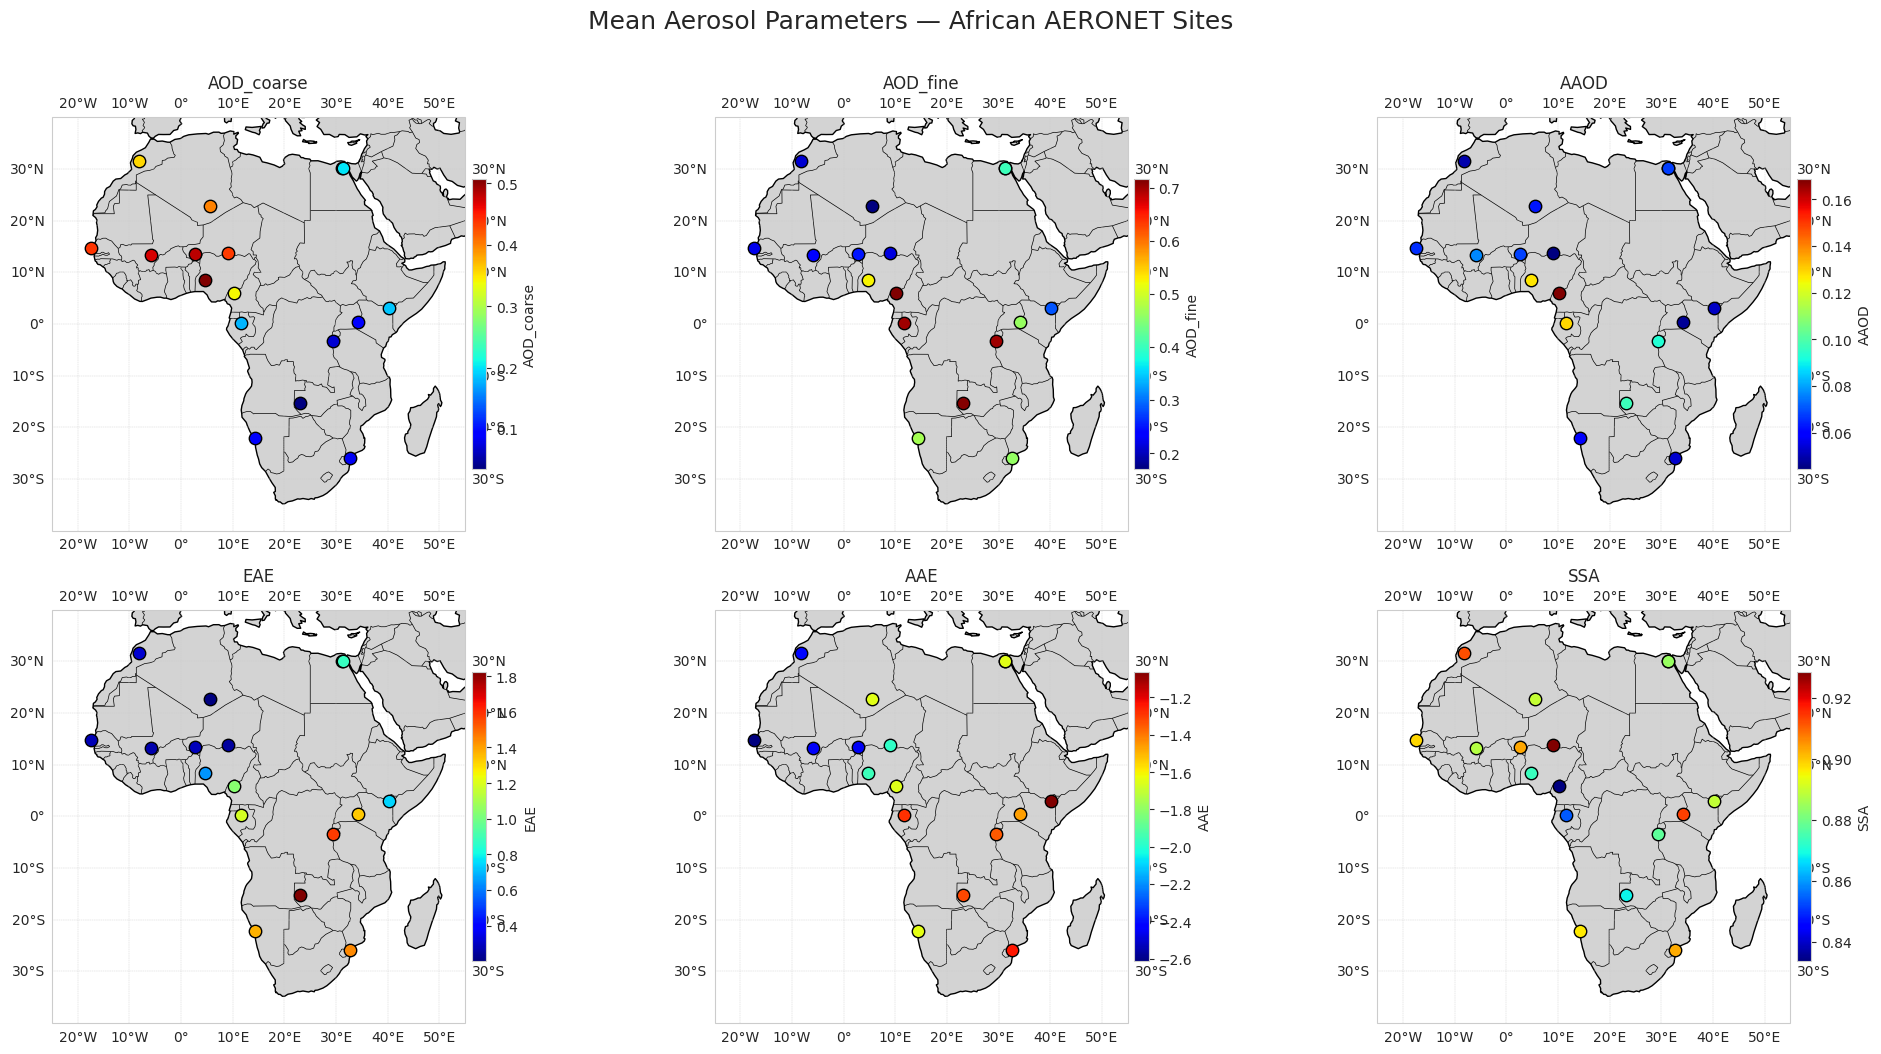

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Correct site coordinates (lat, lon)
site_coords = {
    'Banizoumbou': (13.5, 2.7),
    'Dakar': (14.7, -17.4),
    'Ilorin': (8.5, 4.7),
    'Cairo_University': (30.1, 31.2),
    'IER_Cinzana': (13.3, -5.9),
    'Saada': (31.6, -8.2),
    'Tamanrasset_TMP': (22.8, 5.5),
    'ICIPE-Mbita': (0.4, 34.2),
    'Zinder_DMN': (13.8, 9.0),
    'CRPSM_Malindi': (3.0, 40.2),
    'Cairo_EMA_2': (30.1, 31.3),
    'Henties_Bay': (-22.1, 14.3),
    'Bujumbura': (-3.4, 29.4),
    'Mongu_Inn': (-15.3, 23.1),
    'SEGC_Lope_Gabon': (0.2, 11.6),
    'CATUC_Bamenda': (5.9, 10.2),
    'UEM_Maputo': (-25.9, 32.6)
}

# Group to get mean values
mean_data = aerosol.groupby('Site').mean(numeric_only=True).reset_index()

# Column mappings: aerosol data → display name
fields = {
    'AOD_Extinction-Coarse[440nm]': 'AOD_coarse',
    'AOD_Extinction-Fine[440nm]': 'AOD_fine',
    'Absorption_AOD[440nm]': 'AAOD',
    'Extinction_Angstrom_Exponent_440-870nm-Total': 'EAE',
    'Calculated_AAE': 'AAE',
    'Single_Scattering_Albedo[440nm]': 'SSA'
}

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(20, 10),
                         subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, (col, title) in enumerate(fields.items()):
    ax = axes[i]
    ax.set_extent([-25, 55, -40, 40], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_title(title)
    ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.3)

    # Plot each site
    for site, (lat, lon) in site_coords.items():
        match = mean_data[mean_data['Site'].str.contains(site, case=False)]
        if not match.empty:
            value = match[col].values[0]
            scatter = ax.scatter(lon, lat, c=[value], cmap='jet',
                                 vmin=mean_data[col].min(),
                                 vmax=mean_data[col].max(),
                                 s=80, edgecolors='black',
                                 transform=ccrs.Geodetic(), zorder=3)

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01, shrink=0.7)
    cbar.set_label(title)

# Layout
plt.tight_layout()
plt.suptitle("Mean Aerosol Parameters — African AERONET Sites", fontsize=18, y=1.05)
plt.show()


# Seasonal Mean and Uncertainty of Aerosol Optical Properties

In [12]:
aerosol['Date(dd:mm:yyyy)'] = pd.to_datetime(aerosol['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

# Extract the month from the 'Date' column
aerosol['Month'] = aerosol['Date(dd:mm:yyyy)'].dt.month

# Define a function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:  # DJF
        return 'DJF'
    elif month in [3, 4, 5]:  # MAM
        return 'MAM'
    elif month in [6, 7, 8]:  # JJA
        return 'JJA'
    else:  # SON
        return 'SON'

# Apply the function to categorize the months into seasons
aerosol['Season'] = aerosol['Month'].apply(get_season)

# Columns for AOD (fine and coarse modes), SSA, AAOD, EAE, and Absorption_Angstrom_Exponent_440-870nm
columns_of_interest = [
    'AOD_Extinction-Fine[440nm]',
    'AOD_Extinction-Coarse[440nm]',
    'Single_Scattering_Albedo[440nm]',
    'Absorption_AOD[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm'
]

# Group by 'Season' and calculate the mean and std for each season
uncertainty_values_by_season = {}

# Group by season
grouped_by_season = aerosol.groupby('Season')

# For each group (season), calculate the mean and std for each parameter
for season, group in grouped_by_season:
    season_uncertainty = {}
    for col in columns_of_interest:
        mean_value = group[col].mean()
        std_value = group[col].std()
        season_uncertainty[col] = f"{mean_value:.2f} ± {std_value:.2f}"

    uncertainty_values_by_season[season] = season_uncertainty

# Convert the result into a DataFrame
uncertainty_df_by_season = pd.DataFrame.from_dict(uncertainty_values_by_season, orient='index')

# Print the uncertainty DataFrame
print(uncertainty_df_by_season)


    AOD_Extinction-Fine[440nm] AOD_Extinction-Coarse[440nm]  \
DJF                0.49 ± 0.27                  0.41 ± 0.28   
JJA                0.31 ± 0.22                  0.34 ± 0.26   
MAM                0.26 ± 0.14                  0.48 ± 0.29   
SON                0.39 ± 0.27                  0.26 ± 0.21   

    Single_Scattering_Albedo[440nm] Absorption_AOD[440nm]  \
DJF                     0.86 ± 0.04           0.12 ± 0.06   
JJA                     0.90 ± 0.03           0.07 ± 0.03   
MAM                     0.90 ± 0.03           0.07 ± 0.03   
SON                     0.90 ± 0.04           0.06 ± 0.03   

    Extinction_Angstrom_Exponent_440-870nm-Total  \
DJF                                  0.67 ± 0.36   
JJA                                  0.60 ± 0.62   
MAM                                  0.31 ± 0.26   
SON                                  0.83 ± 0.63   

    Absorption_Angstrom_Exponent_440-870nm  
DJF                            1.97 ± 0.71  
JJA                        

In [13]:
import numpy as np
import pandas as pd

# List of columns you want to clean
cols = [
     'AOD_Extinction-Fine[440nm]',
    'AOD_Extinction-Coarse[440nm]',

    'Absorption_AOD[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm'
]

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    return df_cleaned

# Apply outlier removal
aerosol = remove_outliers_iqr(aerosol, cols)

print("✅ Outliers removed. aerosol shape:", aerosol.shape)


✅ Outliers removed. aerosol shape: (22372, 49)


# Spectral Clustering of Aerosol Optical Properties

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Step 1: Select the needed columns
features = [
    'AOD_Extinction-Fine[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm',
    'Single_Scattering_Albedo[440nm]',
    'Refractive_Index-Real_Part[440nm]'
]

# Step 2: Create a feature matrix
X = aerosol[features].copy()

# Step 3: Drop any NaNs (if any)
X = X.dropna()

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply Spectral Clustering
# - 3 clusters (Dust, Biomass, Mixed)
# - Nearest neighbors affinity
clustering = SpectralClustering(
    n_clusters=3,
    assign_labels='kmeans',
    affinity='nearest_neighbors',
    n_neighbors=12,   # As per paper, adjust if needed for better performance
    random_state=42,
    n_init=12          # 12 initializations (very important)
)

# Fit the clustering
labels = clustering.fit_predict(X_scaled)

# Step 6: Assign cluster labels back to your DataFrame with a specific column name
aerosol['Cluster_SpectralAlgo'] = -1
aerosol.loc[X.index, 'Cluster_SpectralAlgo'] = labels

# Step 7: Calculate cluster centroids (original, not scaled!)
centroids = aerosol.loc[X.index].groupby('Cluster_SpectralAlgo')[features].mean()

# Display final centroids
print("Cluster Centroids:")
print(centroids)



Cluster Centroids:
                      AOD_Extinction-Fine[440nm]  \
Cluster_SpectralAlgo                               
0                                       0.215594   
1                                       0.457056   
2                                       0.216806   

                      Extinction_Angstrom_Exponent_440-870nm-Total  \
Cluster_SpectralAlgo                                                 
0                                                         0.232851   
1                                                         0.971498   
2                                                         0.321784   

                      Absorption_Angstrom_Exponent_440-870nm  \
Cluster_SpectralAlgo                                           
0                                                   3.231944   
1                                                   1.558446   
2                                                   1.922771   

                      Single_Scattering_Albedo[4

Silhouette Score: 0.226
Davies-Bouldin Index: 1.418
Calinski-Harabasz Score: 8764.161


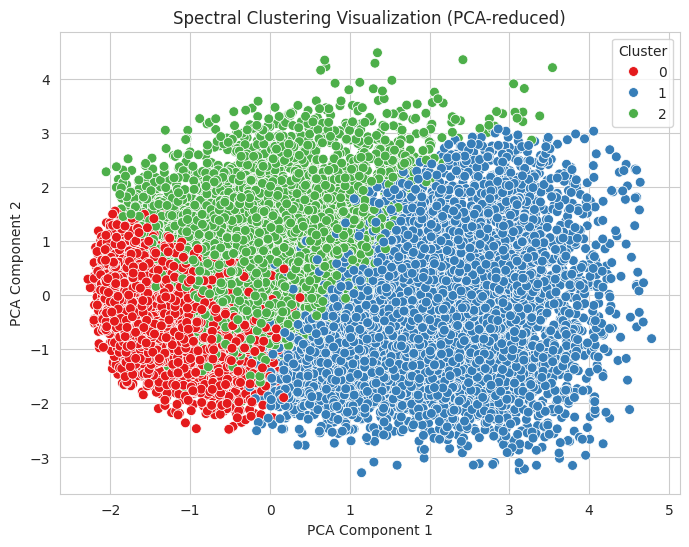

In [15]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation Metrics
silhouette_avg = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

# PCA Visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=50)
plt.title("Spectral Clustering Visualization (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Silhouette Score: Weak separation, but expected for aerosol data.


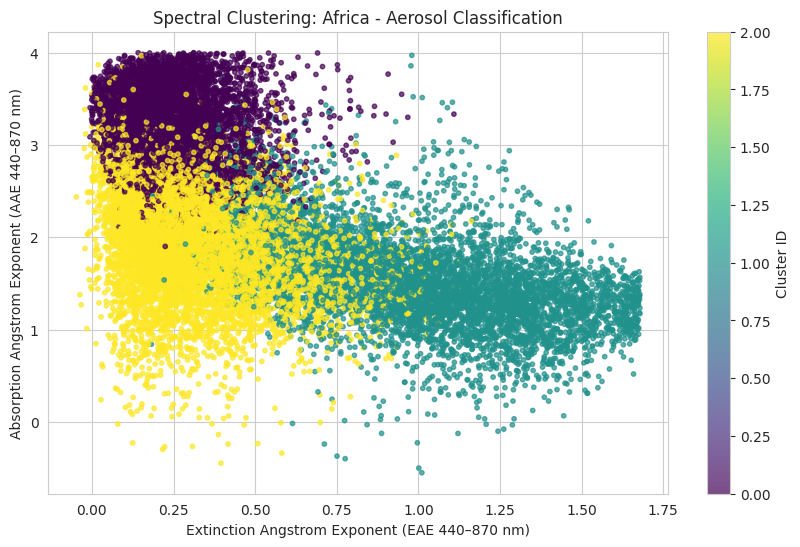

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot: EAE vs AAE colored by cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    aerosol.loc[X.index, 'Extinction_Angstrom_Exponent_440-870nm-Total'],  # EAE
    aerosol.loc[X.index, 'Absorption_Angstrom_Exponent_440-870nm'],         # AAE
    c=aerosol.loc[X.index, 'Cluster_SpectralAlgo'],
    cmap='viridis',  # or you can try 'tab10' for more colorful
    s=10,
    alpha=0.7
)

plt.title('Spectral Clustering: Africa - Aerosol Classification')
plt.xlabel('Extinction Angstrom Exponent (EAE 440–870 nm)')
plt.ylabel('Absorption Angstrom Exponent (AAE 440–870 nm)')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()


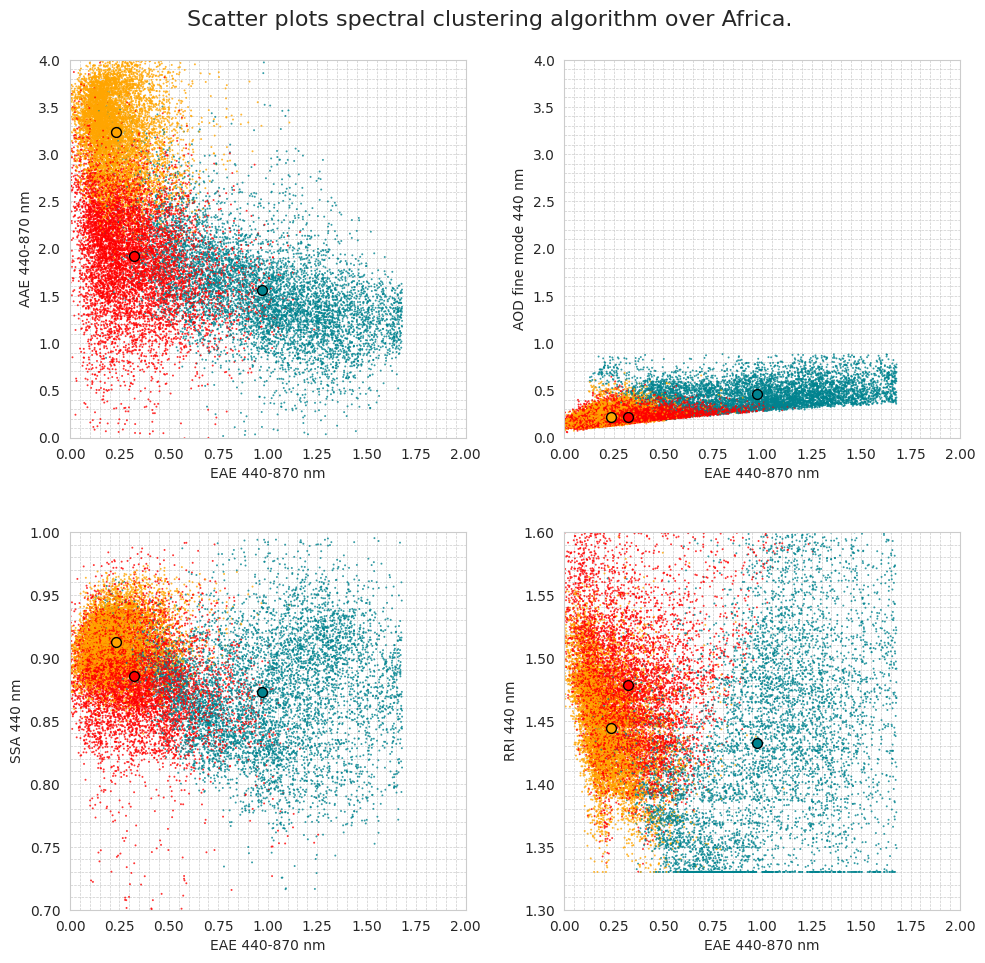

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Feature columns
eae_col = 'Extinction_Angstrom_Exponent_440-870nm-Total'
aae_col = 'Absorption_Angstrom_Exponent_440-870nm'
aod_fine_col = 'AOD_Extinction-Fine[440nm]'
ssa_col = 'Single_Scattering_Albedo[440nm]'
rri_col = 'Refractive_Index-Real_Part[440nm]'

# Cluster labels
clusters = aerosol.loc[X.index, 'Cluster_SpectralAlgo']

# Color map manual
color_order = {0: 'orange', 1: '#00838F', 2: 'red'}  # Sea green for the second cluster
colors = [color_order[c] for c in clusters]

# Cluster centroids
centroids = aerosol.loc[X.index].groupby('Cluster_SpectralAlgo')[[eae_col, aae_col, aod_fine_col, ssa_col, rri_col]].mean()

# Start figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

scatter_kwargs = {'s': 2, 'alpha': 0.8, 'linewidths': 0}

# First plot: EAE vs AAE
ax = axes[0, 0]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, aae_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[aae_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0, 4)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('AAE 440-870 nm')

# Second plot: EAE vs Fine mode AOD
ax = axes[0, 1]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, aod_fine_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[aod_fine_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0, 4)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('AOD fine mode 440 nm')

# Third plot: EAE vs SSA
ax = axes[1, 0]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, ssa_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[ssa_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0.7, 1.0)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('SSA 440 nm')

# Fourth plot: EAE vs RRI
ax = axes[1, 1]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, rri_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[rri_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(1.3, 1.6)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('RRI 440 nm')

# Grid styling
for ax in axes.flat:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

# Adjust spacing
plt.subplots_adjust(left=0.08, right=0.97, top=0.93, bottom=0.08, wspace=0.25, hspace=0.25)

fig.suptitle('Scatter plots spectral clustering algorithm over Africa.', fontsize=16)
plt.show()


# Assigning Cluster Labels via Rule-Based Threshold Conditions



In [18]:
#A5 paper for fmf calculations
def compute_fmf500(row, wavelengths):
    # Computing Fine Mode Fraction at 500 nm using a second-order polynomial fit in log-log space
    # Converting into AOD ∝ λ^−α   =>   log(AOD) = −α log(λ) + constant
    try:
        # Required columns: AOD Extinction for Total and Fine at each wavelength
        required_cols = [f'AOD_Extinction-Total[{wl}nm]' for wl in wavelengths] + \
                        [f'AOD_Extinction-Fine[{wl}nm]' for wl in wavelengths]

        missing_cols = [col for col in required_cols if col not in row.index]
        if missing_cols:
            print(f"Missing columns {missing_cols} in row, returning NaN")
            return np.nan

        log_wls = np.log(wavelengths)
        total = np.array([float(row[f'AOD_Extinction-Total[{wl}nm]']) for wl in wavelengths])
        fine = np.array([float(row[f'AOD_Extinction-Fine[{wl}nm]']) for wl in wavelengths])

        if np.any(total <= 0) or np.any(fine < 0):
            print(f"Invalid AOD values (total <= 0 or fine < 0), returning NaN")
            return np.nan

        # Polynomial fit in log-log space for both Total and Fine AOD
        coeffs_tot = np.polyfit(log_wls, np.log(total), 2)
        coeffs_fine = np.polyfit(log_wls, np.log(fine), 2)

        # Compute AOD at 500 nm for both Total and Fine modes
        tot500 = np.exp(np.polyval(coeffs_tot, np.log(500)))
        fine500 = np.exp(np.polyval(coeffs_fine, np.log(500)))

        # Compute and return Fine Mode Fraction (FMF) at 500 nm
        return fine500 / tot500
    except Exception as e:
        print(f"Error in compute_fmf500: {e}, returning NaN")
        return np.nan


In [19]:
wavelengths = [440, 675, 870, 1020]  # Specify your wavelengths here

# Apply the function to the DataFrame
aerosol['FMF500'] = aerosol.apply(lambda row: compute_fmf500(row, wavelengths), axis=1)


In [20]:
# Function to classify aerosols based on FMF500 and SSA
def classify_aerosol_africa(row):
    # Use FMF500 from the previously computed column
    fmf = row['FMF500']
    ssa = row['Single_Scattering_Albedo[440nm]']

    # Classify based on thresholds
    if fmf < 0.4 and ssa < 0.95:
        return 'Dust'
    elif fmf > 0.6 and ssa < 0.95:
        return 'Biomass Burning'
    elif fmf > 0.6 and ssa > 0.95:
        return 'Mixed'  # Treat Unclassified as Mixed for Africa
    else:
        return 'Mixed'  # Treat Unclassified as Mixed for Africa

# Apply classification to the entire DataFrame
aerosol['Aerosol_Type'] = aerosol.apply(classify_aerosol_africa, axis=1)

# Check the result
print(aerosol['Aerosol_Type'].value_counts())


Aerosol_Type
Dust               13270
Mixed               5091
Biomass Burning     4011
Name: count, dtype: int64


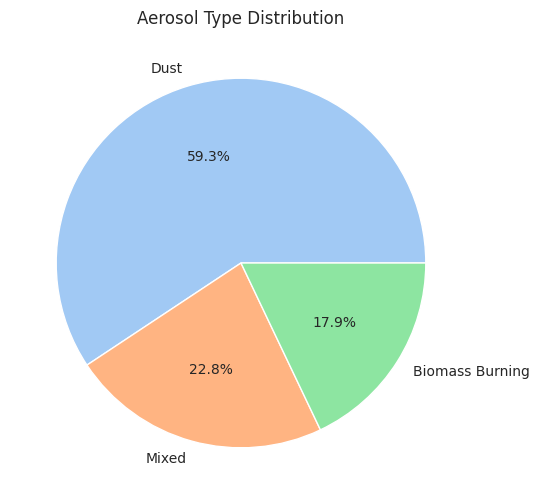

In [21]:
plt.figure(figsize=(6, 6))
aerosol['Aerosol_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Aerosol Type Distribution")
plt.ylabel("")
plt.show()


<ipython-input-22-d669448a4130>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=short_sorted, palette=colors)


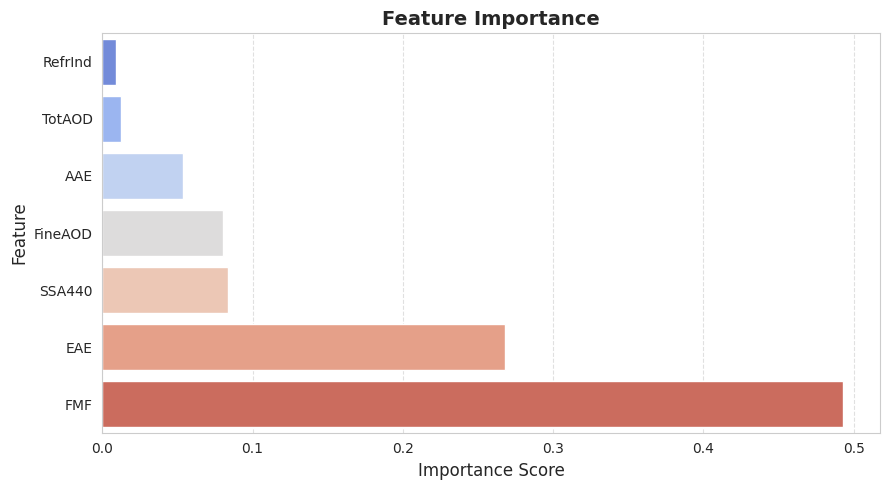

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Define features and target
features = [
    'FMF500',
    'Single_Scattering_Albedo[440nm]',
    'AOD_Extinction-Fine[440nm]',
    'AOD_Extinction-Total[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm',
    'Refractive_Index-Real_Part[440nm]'
]
X = aerosol[features]
y = aerosol['Aerosol_Type']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

# Extract feature importance
importances = rf.feature_importances_
indices = importances.argsort()

# Short feature names for plotting
short_names = [
    'FMF',
    'SSA440',
    'FineAOD',
    'TotAOD',
    'EAE',
    'AAE',
    'RefrInd'
]
short_sorted = [short_names[i] for i in indices]

# Beautiful sleeping-style plot
plt.figure(figsize=(9, 5))
colors = sns.color_palette("coolwarm", len(importances))
sns.barplot(x=importances[indices], y=short_sorted, palette=colors)

plt.title('Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


<ipython-input-23-5a19183ad8f8>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aerosol.set_index('Date').resample('M')['Aerosol_Type'].value_counts().unstack().plot.area(stacked=True, colormap='Accent')


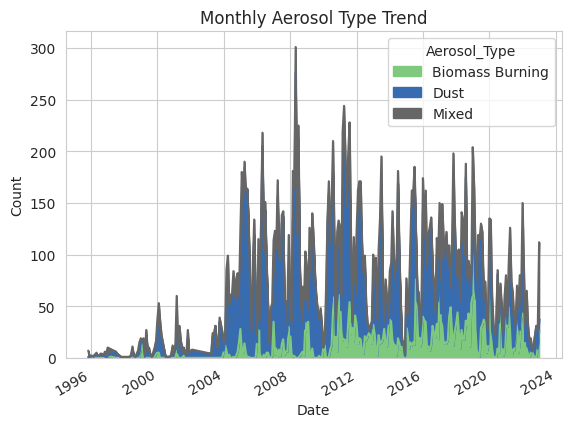

In [23]:
aerosol['Date'] = pd.to_datetime(aerosol['Date(dd:mm:yyyy)'])
aerosol.set_index('Date').resample('M')['Aerosol_Type'].value_counts().unstack().plot.area(stacked=True, colormap='Accent')
plt.title("Monthly Aerosol Type Trend")
plt.ylabel("Count")
plt.show()


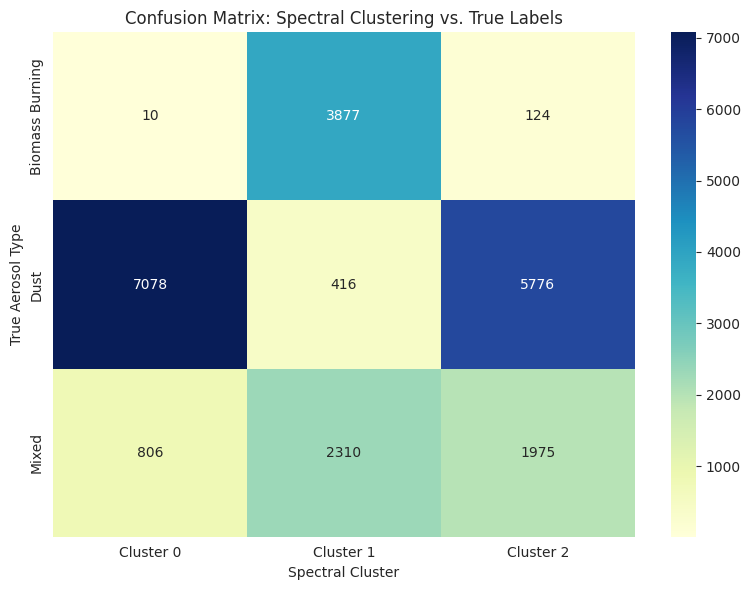

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the true labels
le = LabelEncoder()
true_labels_encoded = le.fit_transform(aerosol['Aerosol_Type'])
cluster_labels = aerosol['Cluster_SpectralAlgo']

# Confusion matrix
cm = confusion_matrix(true_labels_encoded, cluster_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=[f'Cluster {i}' for i in range(cm.shape[1])],
            yticklabels=le.classes_)
plt.xlabel('Spectral Cluster')
plt.ylabel('True Aerosol Type')
plt.title('Confusion Matrix: Spectral Clustering vs. True Labels')
plt.tight_layout()
plt.show()


In [25]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(true_labels_encoded, cluster_labels)
nmi = normalized_mutual_info_score(true_labels_encoded, cluster_labels)

print(f'Adjusted Rand Index (ARI): {ari:.3f}')
print(f'Normalized Mutual Info (NMI): {nmi:.3f}')


Adjusted Rand Index (ARI): 0.295
Normalized Mutual Info (NMI): 0.349


# Dimensionality Reduction using PCA followed by K-Means Clustering

Silhouette Score (KMeans + PCA): 0.4632


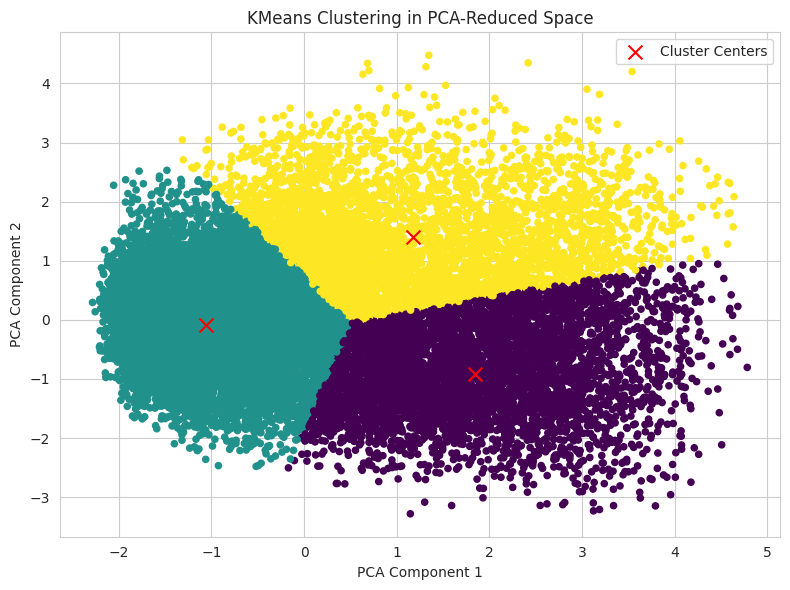

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Select relevant features
features = [
    'AOD_Extinction-Fine[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm',
    'Single_Scattering_Albedo[440nm]',
    'Refractive_Index-Real_Part[440nm]'
]

# Step 2: Create feature matrix
X = aerosol[features].copy()

# Step 3: Drop missing values
X = X.dropna()

# Step 4: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: KMeans Clustering in PCA space
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 7: Assign labels back to original DataFrame
aerosol['KMeansPCA_Cluster'] = -1
aerosol.loc[X.index, 'KMeansPCA_Cluster'] = labels

# Step 8: Evaluate with Silhouette Score
score = silhouette_score(X_pca, labels)
print("Silhouette Score (KMeans + PCA):", round(score, 4))

# Optional: Visualize PCA space with clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=100, label='Cluster Centers')
plt.title("KMeans Clustering in PCA-Reduced Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


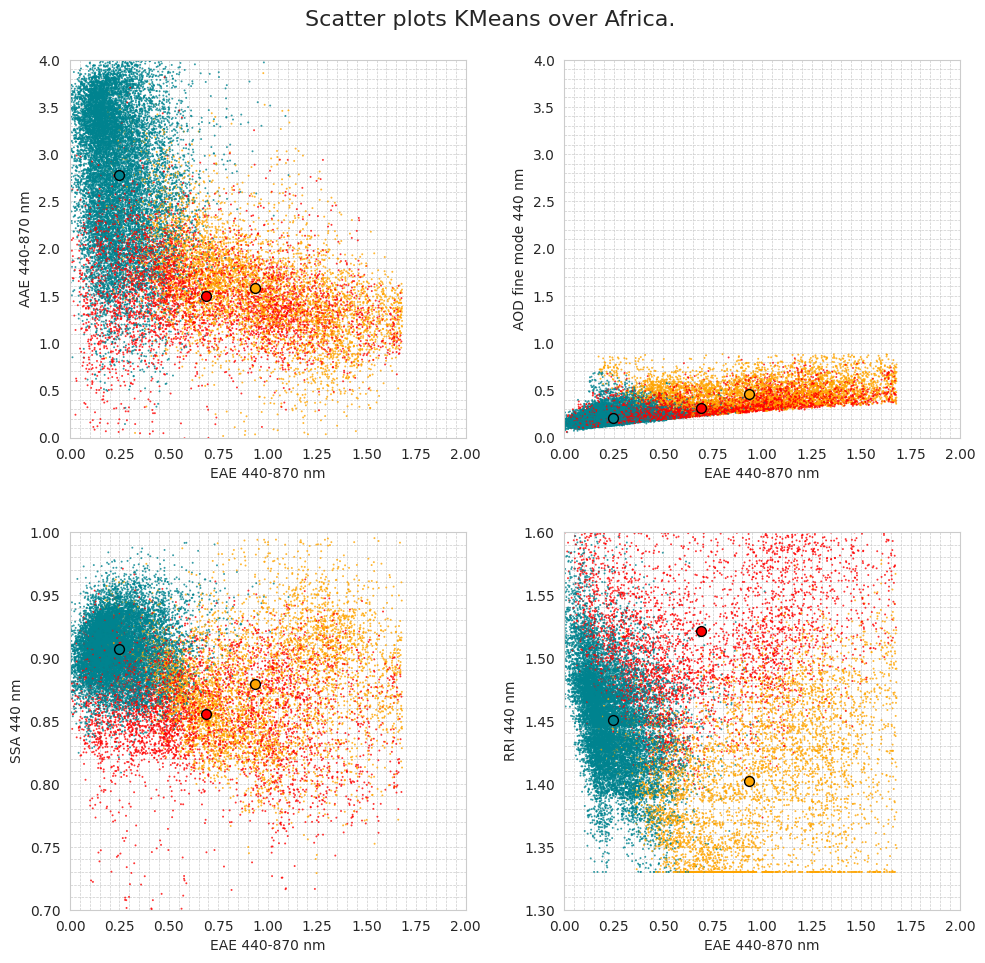

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Feature columns
eae_col = 'Extinction_Angstrom_Exponent_440-870nm-Total'
aae_col = 'Absorption_Angstrom_Exponent_440-870nm'
aod_fine_col = 'AOD_Extinction-Fine[440nm]'
ssa_col = 'Single_Scattering_Albedo[440nm]'
rri_col = 'Refractive_Index-Real_Part[440nm]'

# Cluster labels
clusters = aerosol.loc[X.index, 'KMeansPCA_Cluster']

# Color map manual
color_order = {0: 'orange', 1: '#00838F', 2: 'red'}  # Sea green for the second cluster
colors = [color_order[c] for c in clusters]

# Cluster centroids
centroids = aerosol.loc[X.index].groupby('KMeansPCA_Cluster')[[eae_col, aae_col, aod_fine_col, ssa_col, rri_col]].mean()

# Start figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

scatter_kwargs = {'s': 2, 'alpha': 0.8, 'linewidths': 0}

# First plot: EAE vs AAE
ax = axes[0, 0]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, aae_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[aae_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0, 4)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('AAE 440-870 nm')

# Second plot: EAE vs Fine mode AOD
ax = axes[0, 1]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, aod_fine_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[aod_fine_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0, 4)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('AOD fine mode 440 nm')

# Third plot: EAE vs SSA
ax = axes[1, 0]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, ssa_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[ssa_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0.7, 1.0)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('SSA 440 nm')

# Fourth plot: EAE vs RRI
ax = axes[1, 1]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, rri_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[rri_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(1.3, 1.6)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('RRI 440 nm')

# Grid styling
for ax in axes.flat:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

# Adjust spacing
plt.subplots_adjust(left=0.08, right=0.97, top=0.93, bottom=0.08, wspace=0.25, hspace=0.25)

fig.suptitle('Scatter plots KMeans over Africa.', fontsize=16)
plt.show()


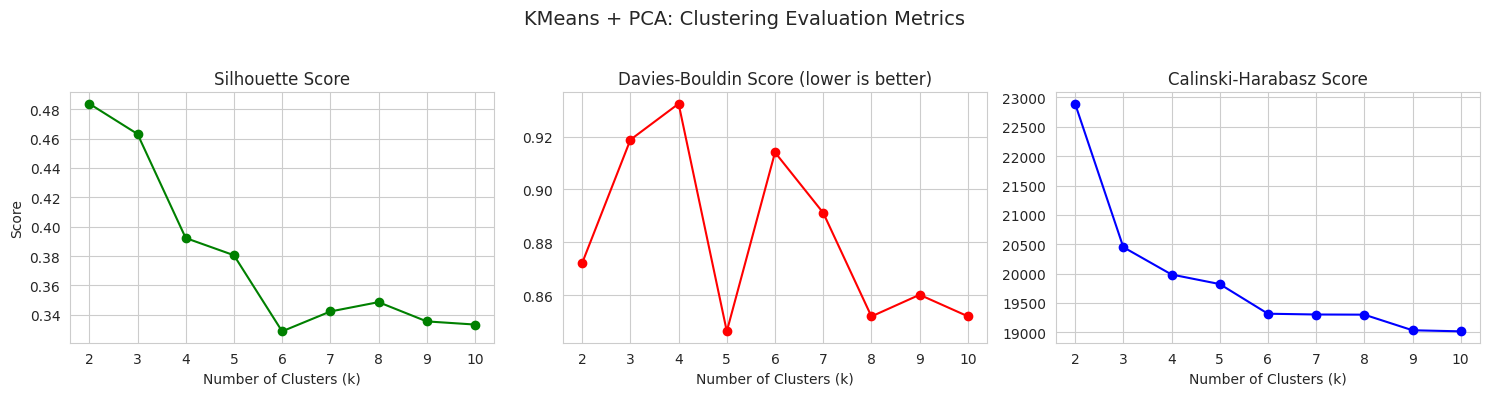

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

# Step 1: Feature Selection & Scaling
features = [
    'AOD_Extinction-Fine[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm',
    'Single_Scattering_Albedo[440nm]',
    'Refractive_Index-Real_Part[440nm]'
]
X = aerosol[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Compute scores for k = 2 to 10
cluster_range = range(2, 11)
sil_scores = []
db_scores = []
ch_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)

    sil_scores.append(silhouette_score(X_pca, labels))
    db_scores.append(davies_bouldin_score(X_pca, labels))
    ch_scores.append(calinski_harabasz_score(X_pca, labels))

# Step 4: Plotting
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(cluster_range, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Score (lower is better)")
plt.xlabel("Number of Clusters (k)")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(cluster_range, ch_scores, marker='o', color='blue')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Number of Clusters (k)")
plt.grid(True)

plt.suptitle("KMeans + PCA: Clustering Evaluation Metrics", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


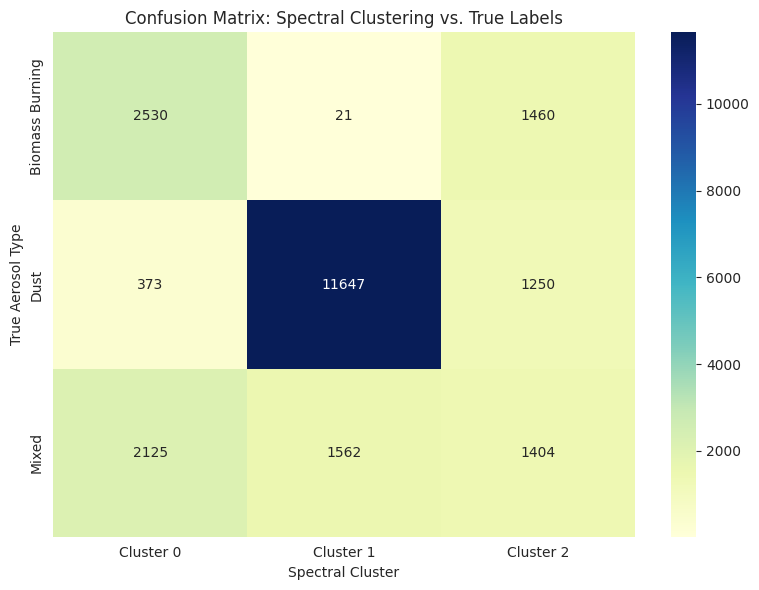

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the true labels
le = LabelEncoder()
true_labels_encoded = le.fit_transform(aerosol['Aerosol_Type'])
cluster_labels = aerosol['KMeansPCA_Cluster']

# Confusion matrix
cm = confusion_matrix(true_labels_encoded, cluster_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=[f'Cluster {i}' for i in range(cm.shape[1])],
            yticklabels=le.classes_)
plt.xlabel('Spectral Cluster')
plt.ylabel('True Aerosol Type')
plt.title('Confusion Matrix: Spectral Clustering vs. True Labels')
plt.tight_layout()
plt.show()


# Other Algos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # Only for plotting

# Step 1: Select relevant features
features = [
    'AOD_Extinction-Fine[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm',
    'Single_Scattering_Albedo[440nm]',
    'Refractive_Index-Real_Part[440nm]'
]

# Step 2: Create feature matrix and drop missing values
X = aerosol[features].dropna()

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 5: Assign cluster labels to original DataFrame
aerosol['KMeans_Cluster'] = -1
aerosol.loc[X.index, 'KMeans_Cluster'] = labels

# Step 6: Evaluate clustering
score = silhouette_score(X_scaled, labels)
print("Silhouette Score (KMeans without PCA):", score)




Silhouette Score (KMeans without PCA): 0.2537695079881341


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the true labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(aerosol['Aerosol_Type'])

# Check encoded labels
print(true_labels_encoded[:10])  # Preview the first 10 labels


[2 2 2 2 1 2 2 2 2 0]


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
# Feature selection and scaling
features = ['Extinction_Angstrom_Exponent_440-870nm-Total',
            'Absorption_Angstrom_Exponent_440-870nm',
            'AOD_Extinction-Fine[440nm]',
            'Single_Scattering_Albedo[440nm]',
            'Refractive_Index-Real_Part[440nm]']

X = aerosol[features]
X_scaled = StandardScaler().fit_transform(X)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

# Evaluate with ARI and NMI
agglo_ari = adjusted_rand_score(true_labels_encoded, agglo_labels)
agglo_nmi = normalized_mutual_info_score(true_labels_encoded, agglo_labels)

print(f'Agglomerative Clustering ARI: {agglo_ari:.3f}')
print(f'Agglomerative Clustering NMI: {agglo_nmi:.3f}')


Agglomerative Clustering ARI: 0.390
Agglomerative Clustering NMI: 0.343


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature selection and scaling
features = ['Extinction_Angstrom_Exponent_440-870nm-Total',
            'Absorption_Angstrom_Exponent_440-870nm',
            'AOD_Extinction-Fine[440nm]',
            'Single_Scattering_Albedo[440nm]',
            'Refractive_Index-Real_Part[440nm]']

X = aerosol[features]
X_scaled = StandardScaler().fit_transform(X)

# Encode true labels
le = LabelEncoder()
true_labels_encoded = le.fit_transform(aerosol['Aerosol_Type'])

# GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluation
gmm_ari = adjusted_rand_score(true_labels_encoded, gmm_labels)
gmm_nmi = normalized_mutual_info_score(true_labels_encoded, gmm_labels)

print(f'GMM ARI: {gmm_ari:.3f}')
print(f'GMM NMI: {gmm_nmi:.3f}')


GMM ARI: 0.323
GMM NMI: 0.388


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data for supervised learning
X_train, X_test, y_train, y_test = train_test_split(X_scaled, true_labels_encoded, test_size=0.2, random_state=42)

# Train RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       791
           1       0.98      0.99      0.98      2684
           2       0.93      0.91      0.92      1000

    accuracy                           0.96      4475
   macro avg       0.96      0.95      0.95      4475
weighted avg       0.96      0.96      0.96      4475



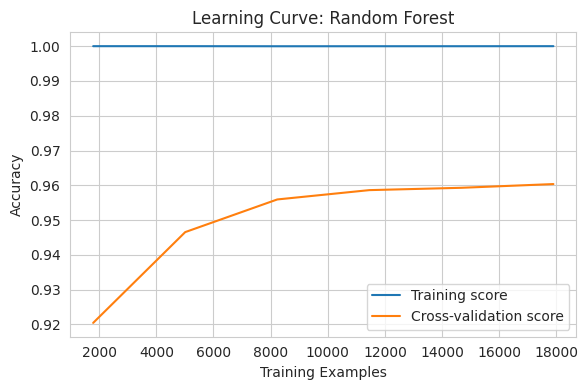

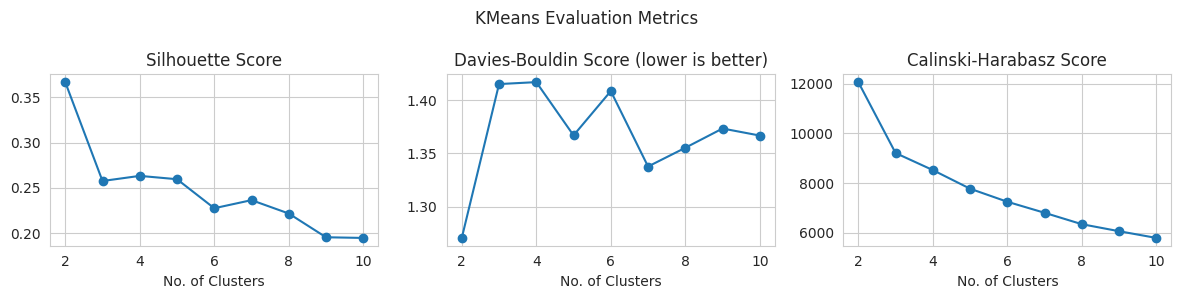

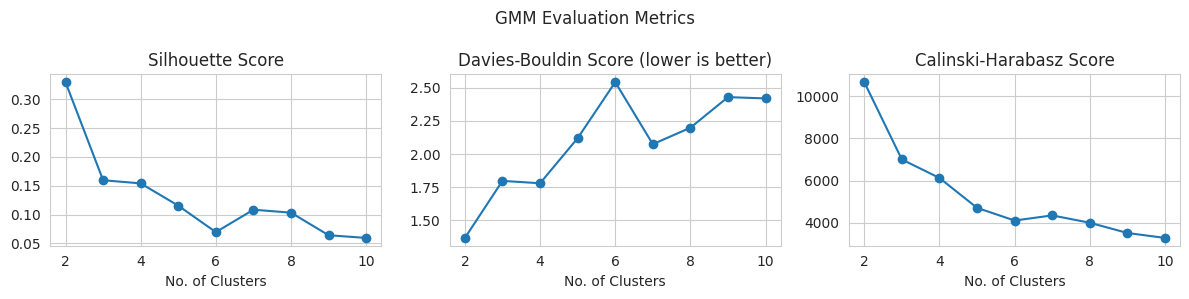

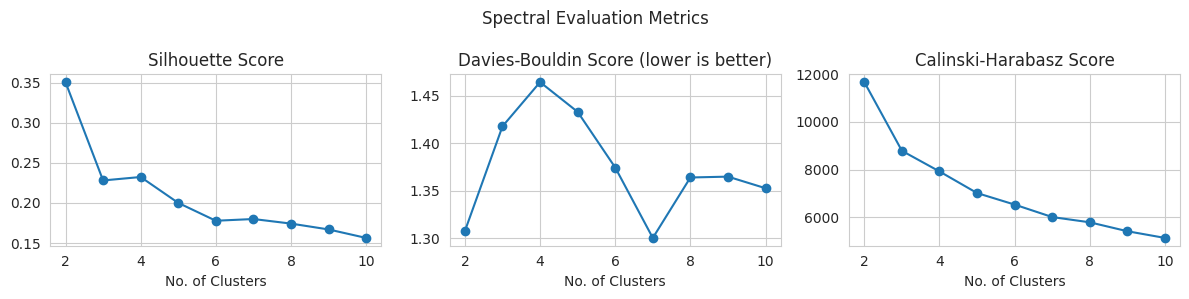

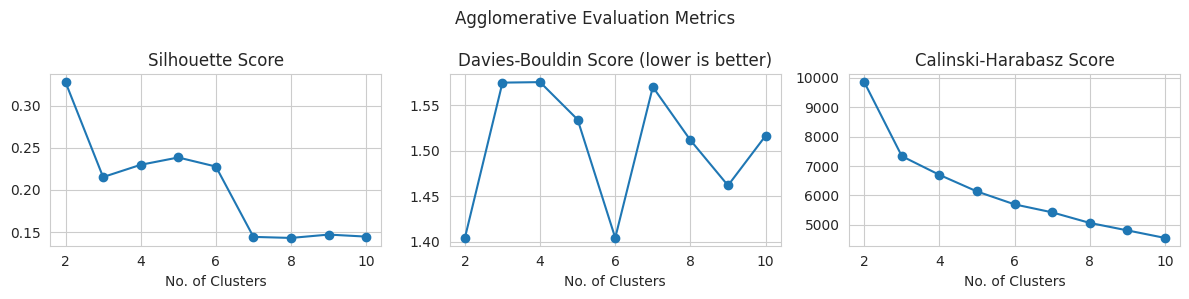

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assume aerosol is your DataFrame
features = ['Extinction_Angstrom_Exponent_440-870nm-Total',
            'Absorption_Angstrom_Exponent_440-870nm',
            'AOD_Extinction-Fine[440nm]',
            'Single_Scattering_Albedo[440nm]',
            'Refractive_Index-Real_Part[440nm]']
X = aerosol[features]
X_scaled = StandardScaler().fit_transform(X)

# -------------------- Supervised: Random Forest --------------------
# If you have ground-truth labels:
y = aerosol['Aerosol_Type']  # Replace with actual label column name

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), X_scaled, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 6), scoring='accuracy'
)
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve: Random Forest')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------- Unsupervised: Clustering Evaluation --------------------
cluster_range = range(2, 11)
models = {
    "KMeans": lambda k: KMeans(n_clusters=k, random_state=42),
    "GMM": lambda k: GaussianMixture(n_components=k, random_state=42),
    "Spectral": lambda k: SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42),
    "Agglomerative": lambda k: AgglomerativeClustering(n_clusters=k)
}

for name, model_fn in models.items():
    sil_scores = []
    db_scores = []
    ch_scores = []

    for k in cluster_range:
        model = model_fn(k)
        if name == 'GMM':
            labels = model.fit(X_scaled).predict(X_scaled)
        else:
            labels = model.fit_predict(X_scaled)

        sil_scores.append(silhouette_score(X_scaled, labels))
        db_scores.append(davies_bouldin_score(X_scaled, labels))
        ch_scores.append(calinski_harabasz_score(X_scaled, labels))

    plt.figure(figsize=(12, 3))
    plt.suptitle(f'{name} Evaluation Metrics')

    plt.subplot(1, 3, 1)
    plt.plot(cluster_range, sil_scores, marker='o')
    plt.title("Silhouette Score")
    plt.xlabel("No. of Clusters")

    plt.subplot(1, 3, 2)
    plt.plot(cluster_range, db_scores, marker='o')
    plt.title("Davies-Bouldin Score (lower is better)")
    plt.xlabel("No. of Clusters")

    plt.subplot(1, 3, 3)
    plt.plot(cluster_range, ch_scores, marker='o')
    plt.title("Calinski-Harabasz Score")
    plt.xlabel("No. of Clusters")

    plt.tight_layout()
    plt.show()
